In [1]:
import numpy as np
from astropy.table import Table, Column, vstack
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
from scipy import integrate
from scipy.special import gammaln
import time
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.optimize import minimize
%matplotlib inline

In [2]:
#Import my own functions:
import bayes
import simdat

number of photons observed = 500642
generating photon energies via CDF method
Time to generate photon energies = 0.0406739711761 seconds
Fraction of photons that are piled = 0.959697748091


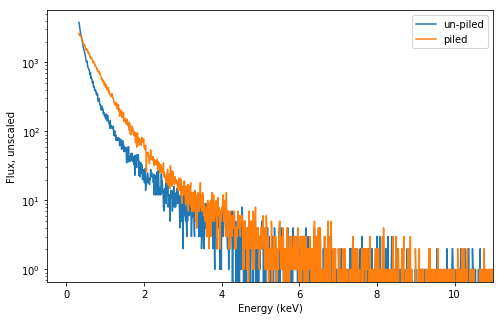

In [3]:
energy,piled_energy = simdat.simulate_data(500000,'cdf')
energy_hist, piled_hist = simdat.plot_data(energy,piled_energy)

In [4]:
arf = Table.read('/Users/mlazz/Dropbox/UW/PileupABC/13858/repro/SDSSJ091449.05+085321.corr.arf',format='fits')
E_min = np.array(arf['ENERG_LO'])
E_max = np.array(arf['ENERG_HI'])

In [8]:
init_params = [np.log(1000000),2.7]
opt = minimize(bayes.neg_log_likelihood,init_params,args=(energy_hist,E_max,E_min),method='Nelder-Mead',options={'disp': True})
print opt.x

Optimization terminated successfully.
         Current function value: -842237.429179
         Iterations: 60
         Function evaluations: 134
[ 9.74017015  2.70472081]
